# Задача №1

In [111]:
import re
import numpy as np
from scipy.spatial import distance

file = open('2\sentences.txt', 'r')
data_line = file.read().splitlines()
data_line = list(map(str.lower, data_line))
diction = list()
for i in range(0,(len(data_line))):
    data_line[i] = list(re.split('[^a-z]', data_line[i]))
    data_line[i] = [buf_i for buf_i in data_line[i] if buf_i]
    for word in data_line[i]:
        if word not in diction:
            diction.append(word) # создание 'типа' словаря
            
arr = np.zeros((len(data_line), len(diction))) # заполнение массива
print (arr)
for i in range(0,(len(data_line))):
    for j in range(0,(len(diction))):
        k = 0
        for data_line_i in data_line[i]:
            if data_line_i == diction[j]:
                k += 1
        arr[i, j] = k


#print (arr[12])
#print (diction, '\n', len(diction))
#print (dict([data_line[0]],10))
# for i in data_line:
#      print (i,)

res = list()
for i in range(0,(len(data_line))):
    res.append(distance.cosine(arr[0], arr[i]))
print (res)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0.0, 0.9527544408738466, 0.8644738145642124, 0.8951715163278082, 0.7770887149698589, 0.9402385695332803, 0.7327387580875756, 0.9258750683338899, 0.8842724875284311, 0.9055088817476932, 0.8328165362273942, 0.8804771390665607, 0.8396432548525454, 0.8703592552895671, 0.8740118423302576, 0.9442721787424647, 0.8406361854220809, 0.956644501523794, 0.9442721787424647, 0.8885443574849294, 0.8427572744917122, 0.8250364469440588]


In [4]:
print (a)

<_io.TextIOWrapper name='2\\sentences.txt' mode='r' encoding='cp1251'>


In [112]:
from numpy import zeros, dot, savetxt
from numpy.linalg import norm
 
# Definition of a cosine distance function
# according to scipy.spatial.distance.cosine function's description 
def cosine_distance(u, v):
    return 1.0 - (dot(u, v) / (norm(u) * norm(v)))
 
if __name__ == "__main__":
    with open("2\sentences.txt") as f:
        # Let's determine a number of lines in a text file
        lines = sum(1 for _ in f)
        f.seek(0)
        
        import re
        words = {}
        # The 'lcount' variable controlls the index of a current line in the text file,
        # when the 'wcount' variable controlls the index of a unique word.
        lcount, wcount = 0, 0
        for line in f:
            # Here we compile a pattern object, read a line from the text file,
            # and split it into tokens (words).
            p = re.compile(r"[^a-z]+")
            tokens = p.split(line.lower())
            # In this case we will have only one empty token at the end of a list.
            # Let's remove it.
            tokens.pop()
            for token in tokens:
                # If a token is not presented in the dictionary yet then we add it.
                # The value of the 'occurrences' entry is a list object where every item represents
                # a specific line in the text file. The first item represents the first line, the second item
                # represents the sencond line etc. 
                if token not in words:
                    words[token] = {
                        "index": wcount,
                        "occurrences": [0] * lines
                    }
                    wcount += 1
                # If we find the same token in the same list of tokens (in the same line)
                # then we just ignore it.
                elif words[token]["occurrences"][lcount] != 0:
                    continue
                
                # Here we register how many times a token occured in a list of tokens (in a line)    
                words[token]["occurrences"][lcount] = tokens.count(token)    
            lcount += 1
        #print (words)
        # Here we create a numpy-array, filled with zeros
        arr = zeros((lines, len(words)))
        
        # Now for every word in the dictionary we take a number of its occurrences
        # in every line and put it to the array.  
        for word in words:
            i, j = 0, words[word]["index"]
            for occ in words[word]["occurrences"]:
                arr[i, j] = occ
                i += 1
        #print (arr[12])
        #savetxt("foo.csv", arr, delimiter=",")
        
        # Finally we calculate a cosine distance between the first sentence (line) and
        # other sentences in the text file
        dist = [] 
        u = arr[0,] 
        for i in range(1, lines):
            v = arr[i,]
            dist.append({"index": i, "distance": cosine_distance(u, v)})    
        print (dist)
        dist.sort(key=lambda x: x["distance"])
        print("The 1st closest sentence is a sentence #%d with a cosine distance of %.2f.\n"\
        "The 2nd closest sentence is a sentence #%d with a cosine distance of %.2f." % (
            dist[0]["index"],
            dist[0]["distance"],
            dist[1]["index"],
            dist[1]["distance"]
        ))

[{'index': 1, 'distance': 0.9527544408738466}, {'index': 2, 'distance': 0.8644738145642124}, {'index': 3, 'distance': 0.8951715163278082}, {'index': 4, 'distance': 0.7770887149698589}, {'index': 5, 'distance': 0.9402385695332803}, {'index': 6, 'distance': 0.7327387580875756}, {'index': 7, 'distance': 0.9258750683338899}, {'index': 8, 'distance': 0.884272487528431}, {'index': 9, 'distance': 0.9055088817476932}, {'index': 10, 'distance': 0.8328165362273942}, {'index': 11, 'distance': 0.8804771390665607}, {'index': 12, 'distance': 0.8396432548525454}, {'index': 13, 'distance': 0.8703592552895671}, {'index': 14, 'distance': 0.8740118423302576}, {'index': 15, 'distance': 0.9442721787424647}, {'index': 16, 'distance': 0.8406361854220809}, {'index': 17, 'distance': 0.956644501523794}, {'index': 18, 'distance': 0.9442721787424647}, {'index': 19, 'distance': 0.8885443574849294}, {'index': 20, 'distance': 0.8427572744917122}, {'index': 21, 'distance': 0.8250364469440586}]
The 1st closest sentenc

# Задача №2

In [137]:
x = np.array([[1**0, 1**1, 1**2, 1**3], [4**0, 4**1, 4**2, 4**3], [10**0, 10**1, 10**2, 10**3], [15**0, 15**1, 15**2, 15**3]])

import math
import scipy
s_x = list(map(float, [1, 4, 10, 15])) 
s_x = [(math.sin(x/5.)*math.exp(x/10.)+5.*math.exp(-x/2.)) for x in s_x]
# f = np.array([math.sin(x/5.)*math.exp(x/10.)+5.*math.exp(-x/2.)
f = np.array(s_x)
print (f)
w = scipy.linalg.solve(x, f)
print (w)

[3.25221687 1.74684595 2.50541641 0.63522142]
[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


[ 3.43914511 -0.18692825]
[ 3.32512949 -0.06531159 -0.00760104]
[ 4.36264154 -1.29552587  0.19333685 -0.00823565]


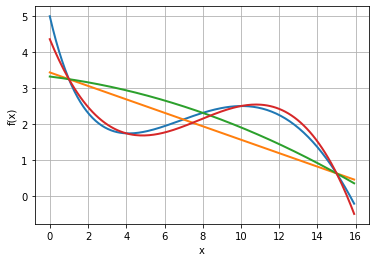

In [140]:
import math
import numpy as np
import matplotlib.pyplot as plt
 
from itertools import cycle
from functools import partial
from mpmath import mp
 
       
# mp.dps = 25
# mp.pretty = False
 
 
 
def f(x, ctx=math):
    return ctx.sin(x / 5) * ctx.exp(x / 10) + 5 * ctx.exp(-x / 2)
 
 
def approx_f(x, ws):
    return sum(x**i * w for i, w in enumerate(ws))
 
 
def a_matrix(xs, *, matrix=lambda x: x):
    return matrix([[x**n for n in range(len(xs))] for x in xs])
 
    
def b_matrix(xs, f, *, matrix=lambda x: x):
    return matrix([f(x) for x in xs])
 
 
def plot(fs, xlim, points=200):
    a, b = xlim
    colors = cycle(['b', 'r', 'g', 'm', 'k'])
    fig, ax = plt.subplots()
    xs = np.arange(a, b, (b-a)/points)
    for f, clr in zip(fs, colors):
        ys = [f(x) for x in xs]
        ax.plot(xs, ys, linewidth=2)
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.grid(True)
    plt.show()
   
 
 
xpoints = [
    (1, 15),
    (1, 8, 15),
    (1, 4, 10, 15),
]
 
fs = [f]
for xs in xpoints:
    a = a_matrix(xs)
    b = b_matrix(xs, f)
    # ws = mp.lu_solve(a, b)
    # ws = scipy.linalg.solve(a, b)
    ws = np.linalg.solve(a,b)
    print (ws)
    tf = partial(approx_f, ws=ws)
    fs.append(tf)
 
# mp.plot(fs, (0, 16))
plot(fs, (0, 16))

## Задача 3

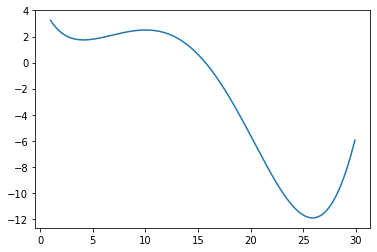

Wall time: 2.95 ms
      fun: -11.503580766270698
 hess_inv: array([[49.07083863]])
      jac: array([-0.6282866])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 63
      nit: 1
     njev: 19
   status: 2
  success: False
        x: array([24.67766111])
[4.13627628] 1.7452682903447336 начиная с точки 2
[25.88019321] -11.898894665981313 начиная с точки 30


In [45]:
from scipy import optimize
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):   # The rosenbrock function
    return (math.sin(x/5.)*math.exp(x/10.)+5.*math.exp(-x/2.))

x = np.arange(1,30,0.1)
y = np.array(list(map(f, x)))

#print (x, y)
plt.plot(x, y)
plt.show()

%time minim = optimize.minimize(f, 15) # минимизация функции 15 - точка вокруг которой начинается поиск
print (minim)

minim_2 = optimize.minimize(f, 2, method='BFGS')
print (minim_2.x, f(minim_2.x), 'начиная с точки 2')

minim_3 = optimize.minimize(f, 30, method='BFGS')
print (minim_3.x, f(minim_3.x), 'начиная с точки 30')

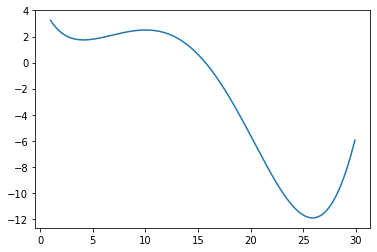

Wall time: 5.99 ms
[25.88019279] -11.898894665981302


In [44]:
from scipy import optimize
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):   # The rosenbrock function
    return (math.sin(x/5.)*math.exp(x/10.)+5.*math.exp(-x/2.))

x = np.arange(1,30,0.1)
y = np.array(list(map(f, x)))

#print (x, y)
plt.plot(x, y)
plt.show()

%time minim = optimize.differential_evolution(f, [(1, 30)]) # конструкция [()] - ваще важна (вообще это список в котором типлы типы переменных)
print (minim.x , minim.fun)


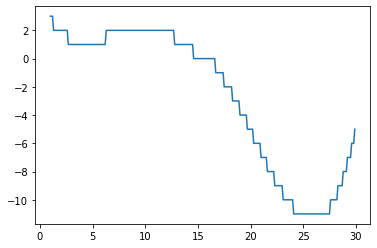

Wall time: 999 µs
[25.88019321] -11.898894665981313
Wall time: 5.98 ms
[24.55326704] -11.0


In [51]:
from scipy import optimize
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x):   # The rosenbrock function
    return (math.sin(x/5.)*math.exp(x/10.)+5.*math.exp(-x/2.))

def h(x):
    return (int(f(x)))

x = np.arange(1,30,0.1)
y = np.array(list(map(h, x)))

#print (x, y)
plt.plot(x, y)
plt.show()

%time minim = optimize.minimize(f, 30, method='BFGS')
print (minim.x , minim.fun)

%time minim_2 = optimize.differential_evolution(h, [(1, 30)]) # конструкция [()] - ваще важна (вообще это список в котором типлы типы переменных)
print (minim_2.x , minim_2.fun)

# Финальная домашка

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


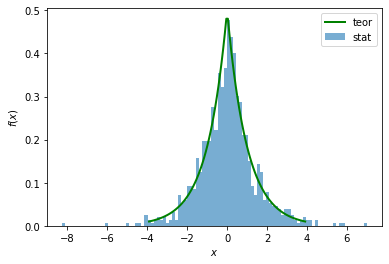

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import laplace # распределение Лапласа

r = laplace.rvs(size=1000) # генерация распределения Лапласа
fig, ax = plt.subplots(1)

x = np.linspace(laplace.ppf(0.01), laplace.ppf(0.99), 100) # построение теоретического значения распределния
ax.plot(x, laplace.pdf(x), 'g-', lw=2, label='teor')

ax.hist(r, bins=100, normed=True, alpha=0.6, label='stat')
ax.legend()
ax.set_ylabel('$f(x)$')
ax.set_xlabel('$x$')
plt.show()

In [104]:
import numpy as np
print (r.mean()) # определение среднего значения для нашей статы

0.03214371062267217


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


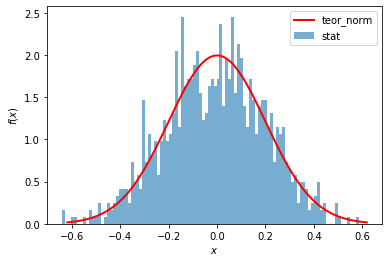

mean -  0    sigma -  1.4142135623730951    se -  0.2


In [113]:
# объем выборки 

from scipy import stats
import math

mean = [] # выборка из объема выборки элементов создается 1000 раз
size_v = 50 # число раз по 1000
for i in range(1000):
    s = laplace.rvs(size = size_v)
    mean.append(s.mean())
    
se = math.sqrt(2.)/math.sqrt(size_v) # взято с википедии (se = sd/n^(1/2)), sd = sqrt(dispers)

fig, ax = plt.subplots(1)
x = np.linspace(stats.norm(0,se).ppf(0.001), stats.norm(0,se).ppf(0.999), 100) # построение теоретического нормального распределния
ax.plot(x, stats.norm(0,se).pdf(x), 'r-', lw=2, label='teor_norm')
ax.hist(mean, bins=100, normed=True, alpha=0.6, label='stat') # построение гистаграммы
ax.legend()
ax.set_ylabel('$f(x)$')
ax.set_xlabel('$x$')
plt.show()

print ('mean - ', 0, '   sigma - ', math.sqrt(2),'   se - ', se, ) # вывод значений для нормального распределения